## Creating Histogram of Difference between True and Predicted
* Mean of such a histogram will show if the model was biased
* Standard deviation will show resolution
    * 1 step = 68% of the time model is +/- x of the true time

In [1]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from tensorflow.keras import layers, models

/Users/Temp/Data4380/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
#dataloader module
import Vision_Dataloader as vd

In [4]:
train_ds,val_ds,targetstats=vd.image_loader('watch_faces_train.parquet',target='list',batches=64,augmentation=False,standardize=True,img_size=(224, 224))

In [5]:
#reloading best model
model3=keras.models.load_model('NoAug100Epochs.keras')

In [6]:
epochs = 100

model3.compile(optimizer=keras.optimizers.Adam(learning_rate=3e-4),loss='mse',metrics=['mae'])

history3 = model3.fit(
    train_ds,
    epochs=epochs,
    #callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 0.0593 - mae: 0.1831 - val_loss: 0.3388 - val_mae: 0.3828
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - loss: 0.0532 - mae: 0.1768 - val_loss: 0.3204 - val_mae: 0.3702
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 952ms/step - loss: 0.0581 - mae: 0.1822 - val_loss: 0.3083 - val_mae: 0.3498
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - loss: 0.0588 - mae: 0.1801 - val_loss: 0.3195 - val_mae: 0.3670
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - loss: 0.0601 - mae: 0.1753 - val_loss: 0.3495 - val_mae: 0.3821
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - loss: 0.0559 - mae: 0.1730 - val_loss: 0.3145 - val_mae: 0.3587
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 988ms/step - loss: 0.0613 - mae: 0.1800 - val_loss: 0.3559 - val_mae: 0.3982
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - loss: 0.0445 - mae: 0.1612 - val_loss: 0.3111 - val_mae: 0.3641
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - loss:

In [7]:
t3_true=[]
t3_pred=[]
for image, label in val_ds.unbatch():
    image=tf.expand_dims(image,axis=0)
    pred=model3.predict(image,verbose=0)[0]
    t3_pred.append(pred)
    t3_true.append(label.numpy())

t3_true=np.array(t3_true)
t3_pred=np.array(t3_pred)

2025-07-30 19:08:43.318519: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [9]:
#Undoing standardization; true values
t3_true[:,0]=t3_true[:,0]*targetstats['Hour']['std']+targetstats['Hour']['mean']
t3_true[:,1]=t3_true[:,1]*targetstats['Minute']['std']+targetstats['Minute']['mean']

In [10]:
t3_true

array([[ 5.1833334e+00,  1.1000000e+01],
       [ 2.7666667e+00,  4.6000000e+01],
       [ 1.7833332e+00,  4.7000000e+01],
       [ 3.5666666e+00,  3.4000000e+01],
       [ 4.0333333e+00,  1.9999995e+00],
       [ 1.0516666e+01,  3.1000000e+01],
       [ 4.0833335e+00,  4.9999990e+00],
       [ 1.2366667e+01,  2.2000000e+01],
       [ 5.3666668e+00,  2.2000000e+01],
       [ 7.1666665e+00,  1.0000001e+01],
       [ 1.1883333e+01,  5.3000000e+01],
       [ 1.0300000e+01,  1.8000000e+01],
       [ 6.6999998e+00,  4.2000000e+01],
       [ 9.1166668e+00,  7.0000010e+00],
       [ 7.2666669e+00,  1.6000000e+01],
       [ 3.0166669e+00,  9.9999970e-01],
       [ 3.2166667e+00,  1.3000000e+01],
       [ 4.5666666e+00,  3.4000000e+01],
       [ 7.1999998e+00,  1.2000000e+01],
       [ 3.7500000e+00,  4.5000000e+01],
       [ 1.1833334e+00,  1.1000000e+01],
       [ 1.1650001e+01,  3.9000000e+01],
       [ 9.1833334e+00,  1.1000000e+01],
       [ 1.3833333e+00,  2.3000000e+01],
       [ 1.58333

In [11]:
#Undoing standardization; predicted values
t3_pred[:,0]=t3_pred[:,0]*targetstats['Hour']['std']+targetstats['Hour']['mean']
t3_pred[:,1]=t3_pred[:,1]*targetstats['Minute']['std']+targetstats['Minute']['mean']
t3_pred

array([[ 4.9872794, 10.979802 ],
       [ 2.6404727, 46.619854 ],
       [ 1.9740291, 41.348396 ],
       [ 4.43947  , 42.419617 ],
       [ 3.0515661,  5.6034474],
       [ 9.889438 , 32.272694 ],
       [ 2.7338016, 11.626398 ],
       [10.57313  , 26.741568 ],
       [ 5.597293 , 16.330418 ],
       [ 6.767722 , 14.027575 ],
       [11.29073  , 48.98953  ],
       [ 9.305954 , 21.925373 ],
       [ 6.600493 , 40.043907 ],
       [ 9.034106 ,  8.244036 ],
       [ 6.2424436, 20.224777 ],
       [ 2.31375  , 48.24132  ],
       [ 2.442652 , 12.193079 ],
       [ 4.0679045, 28.92803  ],
       [ 7.153511 , 15.015936 ],
       [ 3.6639652, 40.4462   ],
       [ 2.149091 ,  9.687087 ],
       [11.797815 , 37.890446 ],
       [ 7.6257477, 10.893893 ],
       [ 2.4114268, 21.374361 ],
       [ 2.0645735, 38.06453  ],
       [ 7.9329095, 37.62266  ],
       [ 9.826383 , 11.719946 ],
       [10.5884695, 46.878113 ],
       [ 4.2654595, 15.027493 ],
       [ 7.0783267, 22.26032  ],
       [11

In [12]:
#difference between True and Predicted
diff=t3_true-t3_pred
diff

array([[ 1.96053982e-01,  2.01978683e-02],
       [ 1.26194000e-01, -6.19853973e-01],
       [-1.90695882e-01,  5.65160370e+00],
       [-8.72803211e-01, -8.41961670e+00],
       [ 9.81767178e-01, -3.60344791e+00],
       [ 6.27228737e-01, -1.27269363e+00],
       [ 1.34953189e+00, -6.62639904e+00],
       [ 1.79353714e+00, -4.74156761e+00],
       [-2.30626106e-01,  5.66958237e+00],
       [ 3.98944378e-01, -4.02757359e+00],
       [ 5.92602730e-01,  4.01047134e+00],
       [ 9.94046211e-01, -3.92537308e+00],
       [ 9.95068550e-02,  1.95609283e+00],
       [ 8.25605392e-02, -1.24403477e+00],
       [ 1.02422333e+00, -4.22477722e+00],
       [ 7.02916861e-01, -4.72413216e+01],
       [ 7.74014711e-01,  8.06921005e-01],
       [ 4.98762131e-01,  5.07196999e+00],
       [ 4.64887619e-02, -3.01593590e+00],
       [ 8.60347748e-02,  4.55379868e+00],
       [-9.65757608e-01,  1.31291294e+00],
       [-1.47814751e-01,  1.10955429e+00],
       [ 1.55758572e+00,  1.06106758e-01],
       [-1.

In [16]:
#mean and standard deviation
hour_mean=np.mean(diff[:,0])
min_mean=np.mean(diff[:,1])

hour_std=np.std(diff[:,0])
min_std=np.std(diff[:,1])
print(f'Difference (Hour): Mean = {hour_mean}, Standard Deviation = {hour_std}')
print(f'Difference (Minute): Mean = {min_mean}, Standard Deviation: {min_std}')

Difference (Hour): Mean = 0.3282434046268463, Standard Deviation = 1.22742760181427
Difference (Minute): Mean = -0.6058306097984314, Standard Deviation: 10.419709205627441


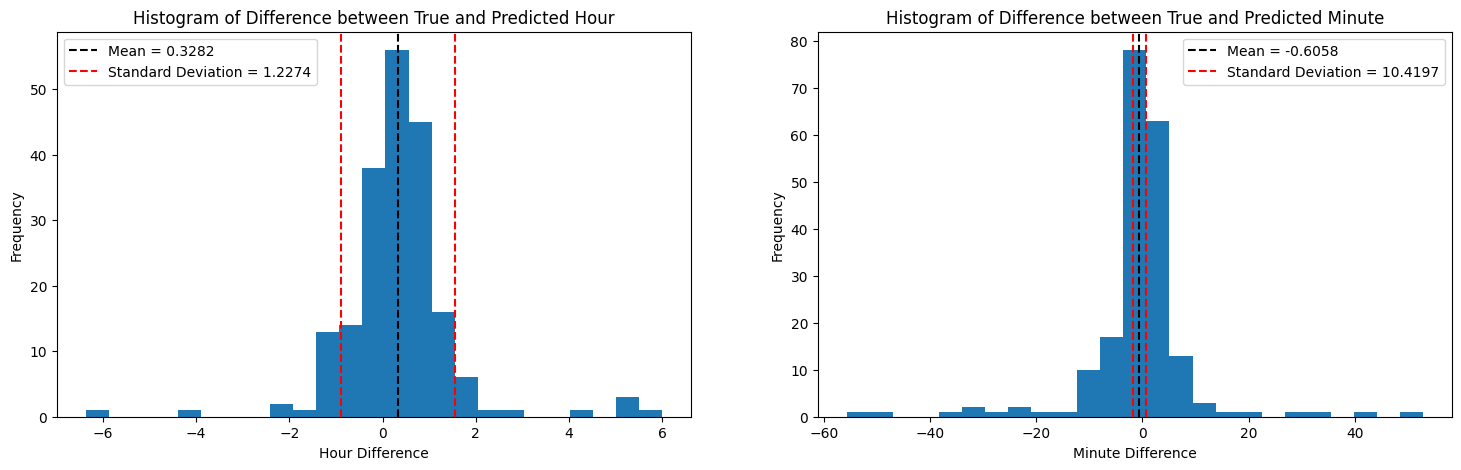

In [25]:
#histogram
plt.figure(figsize=(18, 5))

#hour
plt.subplot(1, 2, 1)
plt.hist(diff[:,0],bins=25)
plt.axvline(hour_mean, color='black', linestyle='--', label=f'Mean = {hour_mean:.4f}')
plt.axvline(hour_mean-hour_std, color='red', linestyle='--', label=f'Standard Deviation = {hour_std:.4f}')
plt.axvline(hour_mean+hour_std, color='red', linestyle='--')
plt.xlabel('Hour Difference')
plt.ylabel('Frequency')
plt.title('Histogram of Difference between True and Predicted Hour')
plt.legend(loc='upper left')

#minute
plt.subplot(1, 2, 2)
plt.hist(diff[:,1],bins=25)
plt.axvline(min_mean, color='black', linestyle='--', label=f'Mean = {min_mean:.4f}')
plt.axvline(min_mean-hour_std, color='red', linestyle='--', label=f'Standard Deviation = {min_std:.4f}')
plt.axvline(min_mean+hour_std, color='red', linestyle='--')
plt.xlabel('Minute Difference')
plt.ylabel('Frequency')
plt.title('Histogram of Difference between True and Predicted Minute')
plt.legend(loc='upper right')

plt.show()